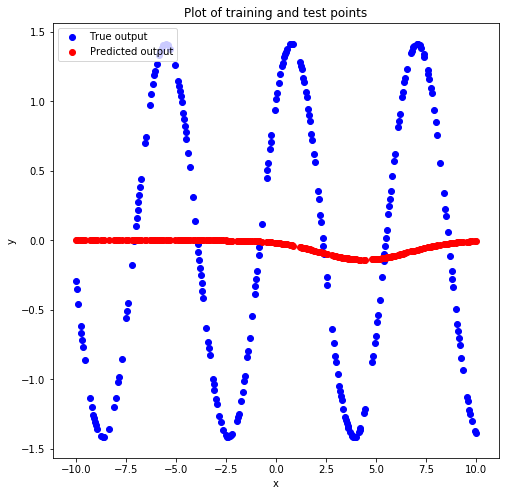

Root mean squares error for  2 landmark points is 0.9732657962971866


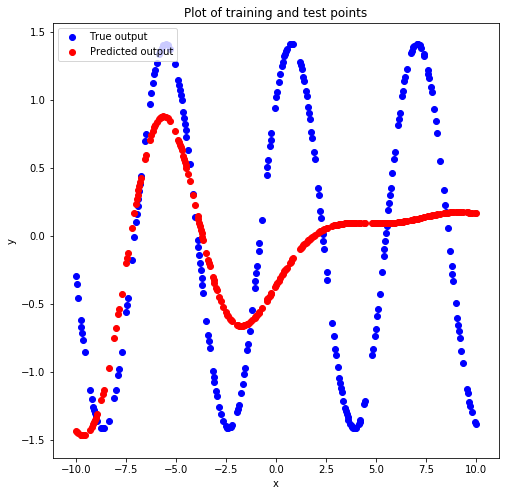

Root mean squares error for  5 landmark points is 0.8568687431140923


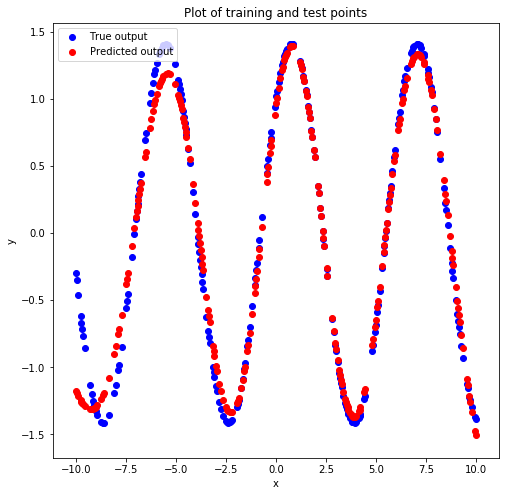

Root mean squares error for  20 landmark points is 0.1530089911537138


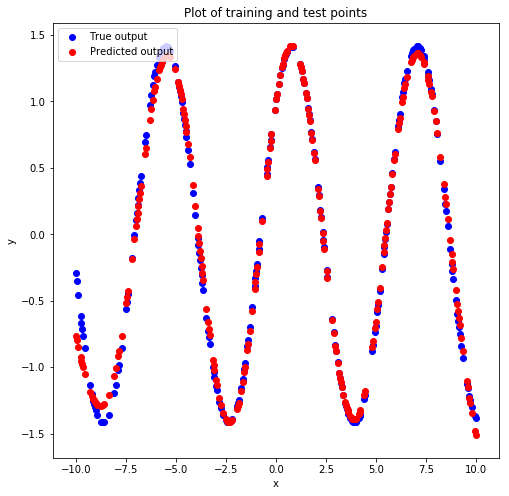

Root mean squares error for  50 landmark points is 0.07704229276669793


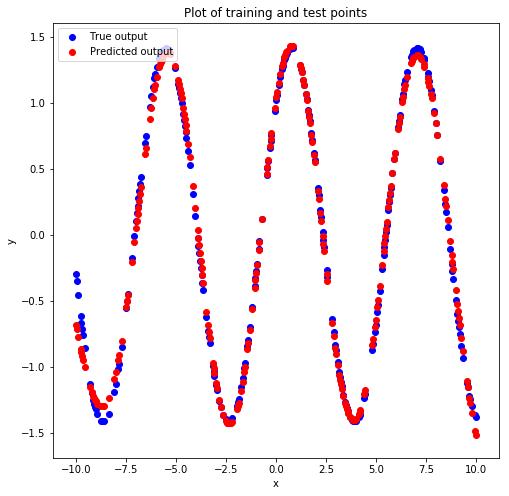

Root mean squares error for  100 landmark points is 0.06509462634665884


In [2]:
from __future__ import division, print_function, unicode_literals
from sklearn import metrics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance

#loading data
dataTrain=np.loadtxt(fname='ridgetrain.txt',dtype=float,delimiter=None)
dataTest=np.loadtxt(fname='ridgetest.txt',dtype=float,delimiter=None)
predictedy=np.zeros(dataTest.shape[0])#stores predicted y

for i in [2,5,20,50,100]:
    lf=np.zeros((dataTrain.shape[0],i))#stores landmark feature matrix of training set
    lft=np.zeros((dataTest.shape[0],i))#stores landmark feature matrix of test set
    for j in range(0,i):
        r=np.random.randint(0,dataTrain.shape[0])
        for k in range(0,dataTrain.shape[0]):
            lf[k,j]=np.exp(-0.1*((np.abs(dataTrain[k][0]-dataTrain[r][0]))**2))
        for k in range(0,dataTest.shape[0]):
            lft[k,j]=np.exp(-0.1*((np.abs(dataTest[k][0]-dataTrain[r][0]))**2))
    #computing w in successive steps
    w=np.transpose(lf)
    w=np.dot(w,lf)
    w=w+np.multiply(0.1,np.identity(i))
    w=np.linalg.inv(w)
    w=np.dot(w,np.transpose(lf))
    w=w.dot(dataTrain[:,1])
    
    #calculating predicted y
    for j in range(0,dataTest.shape[0]):
        predictedy[j]=np.dot(w,lft[j,:])
        
    #plotting the result
    fig = plt.figure(figsize=(8,8))
    actual=matplotlib.pyplot.scatter(dataTest[:,0], dataTest[:,1], c='blue')
    predicted=matplotlib.pyplot.scatter(dataTest[:,0], predictedy, c='red')
    plt.legend((actual,predicted),('True output','Predicted output'),loc='upper left')
    plt.title('Plot of training and test points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    #calculating rmse
    rmse=np.sqrt(metrics.mean_squared_error(dataTest[:,1],predictedy))
    print("Root mean squares error for ",i,"landmark points is",rmse)
